<a href="https://colab.research.google.com/github/patricioterraza/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#F5276C">**Desafío Telecom X – Parte 2: Predicción de Cancelación (Churn) 📊**</font>


🎯 **Misión**

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.


---


🧠 **Objetivos del Desafío**

* Preparar los datos para el modelado (tratamiento, codificación, normalización).

* Realizar análisis de correlación y selección de variables.

* Entrenar dos o más modelos de clasificación.

* Evaluar el rendimiento de los modelos con métricas.

* Interpretar los resultados, incluyendo la importancia de las variables.

* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.


---


🧰 **Lo que vas a practicar**

✅ Preprocesamiento de datos para Machine Learning

✅ Construcción y evaluación de modelos predictivos

✅ Interpretación de resultados y entrega de insights

✅ Comunicación técnica con enfoque estratégico

---
<font color="#F54927">**Diccionario de datos** 📌</font>

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente



# <font color="#F5276C">**1. Preparación de los datos** 🛠️</font>

## <font color="#F54927">1.1. Librerías</font>

In [ ]:
import pandas as pd
import warnings
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

## <font color="#F54927">1.2. Extracción del archivo tratado</font>



> Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.




In [ ]:
warnings.filterwarnings('ignore')

archivo = 'https://raw.githubusercontent.com/patricioterraza/TelecomX_parte2_Latam/refs/heads/main/datos_tratados.csv'
df = pd.read_csv(archivo)


In [ ]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuetas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


## <font color="#F54927">1.3. Eliminación de Columnas Irrelevantes</font>


> Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.



In [ ]:
# Eliminar la columna 'Edad'
df = df.drop('customerid', axis=1)

In [ ]:
#Muestro los Valores únicos para cada columna
for columna in df:
  print(f'{columna}: {pd.unique(df[columna])}')

churn: [0 1]
gender: ['female' 'male']
seniorcitizen: [0 1]
partner: [1 0]
dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phoneservice: [1 0]
multiplelines: ['no' 'yes' 'no phone service']
internetservice: ['dsl' 'fiber optic' 'no']
onlinesecurity: ['no' 'yes' 'no internet service']
onlinebackup: ['yes' 'no' 'no internet service']
deviceprotection: ['no' 'yes' 'no internet service']
techsupport: ['yes' 'no' 'no internet service']
streamingtv: ['yes' 'no' 'no internet service']
streamingmovies: ['no' 'yes' 'no internet service']
contract: ['one year' 'month-to-month' 'two year']
paperlessbilling: [1 0]
paymentmethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
charges.monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
charges.total: [ 593.3 

## <font color="#F54927">1.4. Encoding: Transformando las variables categóricas</font>


> Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.



In [ ]:
# Opción 1: Identificar las columnas categóricas manualmente
categorical_cols = ['gender','multiplelines', 'internetservice', 'onlinesecurity','onlinebackup','deviceprotection',
                        'techsupport','streamingtv', 'streamingmovies', 'contract', 'paymentmethod']

# Opción 2: Identificar las columnas categóricas de forma programática (útil para DataFrames grandes)
# Seleccionar columnas con tipo de dato 'object' (típicamente strings)
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Seleccionar solo las columnas categóricas del DataFrame
X_categorical = df[categorical_cols]

# Crear una instancia de OneHotEncoder
# handle_unknown='ignore': Ignora categorías no vistas en el conjunto de prueba
# sparse_output=False: Devuelve un array denso en lugar de una matriz dispersa
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar (fit) el encoder a los datos y transformar (transform)
encoded_features = encoder.fit_transform(X_categorical)

# Obtener los nombres de las nuevas columnas generadas por el encoder
feature_names = encoder.get_feature_names_out(categorical_cols)

print("Nombres de las nuevas columnas:")
print(feature_names)
print("-" * 50)

# Convertir las características codificadas en un DataFrame de pandas
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Quitar las columnas categóricas originales del DataFrame principal
df_numerical = df.drop(columns=categorical_cols)

# Unir el DataFrame numérico con el DataFrame de características codificadas
df_final = pd.concat([df_numerical, encoded_df], axis=1)

print("\nDataFrame final después de OneHot Encoding de múltiples columnas:")
print(df_final)

Nombres de las nuevas columnas:
['gender_female' 'gender_male' 'multiplelines_no'
 'multiplelines_no phone service' 'multiplelines_yes'
 'internetservice_dsl' 'internetservice_fiber optic' 'internetservice_no'
 'onlinesecurity_no' 'onlinesecurity_no internet service'
 'onlinesecurity_yes' 'onlinebackup_no' 'onlinebackup_no internet service'
 'onlinebackup_yes' 'deviceprotection_no'
 'deviceprotection_no internet service' 'deviceprotection_yes'
 'techsupport_no' 'techsupport_no internet service' 'techsupport_yes'
 'streamingtv_no' 'streamingtv_no internet service' 'streamingtv_yes'
 'streamingmovies_no' 'streamingmovies_no internet service'
 'streamingmovies_yes' 'contract_month-to-month' 'contract_one year'
 'contract_two year' 'paymentmethod_bank transfer (automatic)'
 'paymentmethod_credit card (automatic)' 'paymentmethod_electronic check'
 'paymentmethod_mailed check']
--------------------------------------------------

DataFrame final después de OneHot Encoding de múltiples columna

In [ ]:
df_final.head()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,charges.monthly,charges.total,cuetas_diarias,...,streamingmovies_no,streamingmovies_no internet service,streamingmovies_yes,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.186667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,9,1,0,59.9,542.40,1.996667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,4,1,1,73.9,280.85,2.463333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1,0,13,1,1,98.0,1237.85,3.266667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,0,3,1,1,83.9,267.40,2.796667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   churn                                    7267 non-null   int64  
 1   seniorcitizen                            7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phoneservice                             7267 non-null   int64  
 6   paperlessbilling                         7267 non-null   int64  
 7   charges.monthly                          7267 non-null   float64
 8   charges.total                            7267 non-null   float64
 9   cuetas_diarias                           7267 non-null   float64
 10  gender_female                            7267 no

## <font color="#F54927">1.5. Verificación de la Proporción de Cancelación (Churn)</font>


> Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.



In [ ]:
# Contar la frecuencia de los valores en la columna 'churn' (yes=1 y no=0)
# churn: Indica si el cliente dejó o no la empresa

# 1. Usar value_counts() para obtener los recuentos absolutos
print("\nRecuentos de cada clase en 'churn':")
clase_recuentos = df_final['churn'].value_counts()
print(clase_recuentos)

# 2. Usar value_counts(normalize=True) para obtener las proporciones
print("\nProporciones de cada clase en 'Churn':")
clase_proporciones = df_final['churn'].value_counts(normalize=True)
print(clase_proporciones)

# Opcional: Multiplicar por 100 para ver porcentajes
print("\nPorcentajes de cada clase en 'Churn':")
clase_porcentajes = df_final['churn'].value_counts(normalize=True) * 100
print(clase_porcentajes)

# Opcional: Calcular el ratio de desbalance
# Esto es una forma de cuantificar el desbalance
# Ratio = Cantidad de la clase mayoritaria / Cantidad de la clase minoritaria
if len(clase_recuentos) > 1: # Asegurarse de que hay al menos dos clases
    ratio_desbalance = clase_recuentos.max() / clase_recuentos.min()
    print(f"\nRatio de desbalance (mayoritaria / minoritaria): {ratio_desbalance:.2f} a 1")


Recuentos de cada clase en 'churn':
churn
0    5398
1    1869
Name: count, dtype: int64

Proporciones de cada clase en 'Churn':
churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

Porcentajes de cada clase en 'Churn':
churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

Ratio de desbalance (mayoritaria / minoritaria): 2.89 a 1


# <font color="#F5276C">**2. Correlación y Selección de Variables** 🎯</font>

## <font color="#F54927">2.1. Análisis de Correlación</font>

> Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.



--- Matriz de Correlación Calculada (Primeras 5x5 celdas para visualización) ---
                  churn  seniorcitizen   partner  dependents    tenure
churn          1.000000       0.146733 -0.148546   -0.161384 -0.344079
seniorcitizen  0.146733       1.000000  0.022970   -0.212952  0.018187
partner       -0.148546       0.022970  1.000000    0.448900  0.377551
dependents    -0.161384      -0.212952  0.448900    1.000000  0.159892
tenure        -0.344079       0.018187  0.377551    0.159892  1.000000


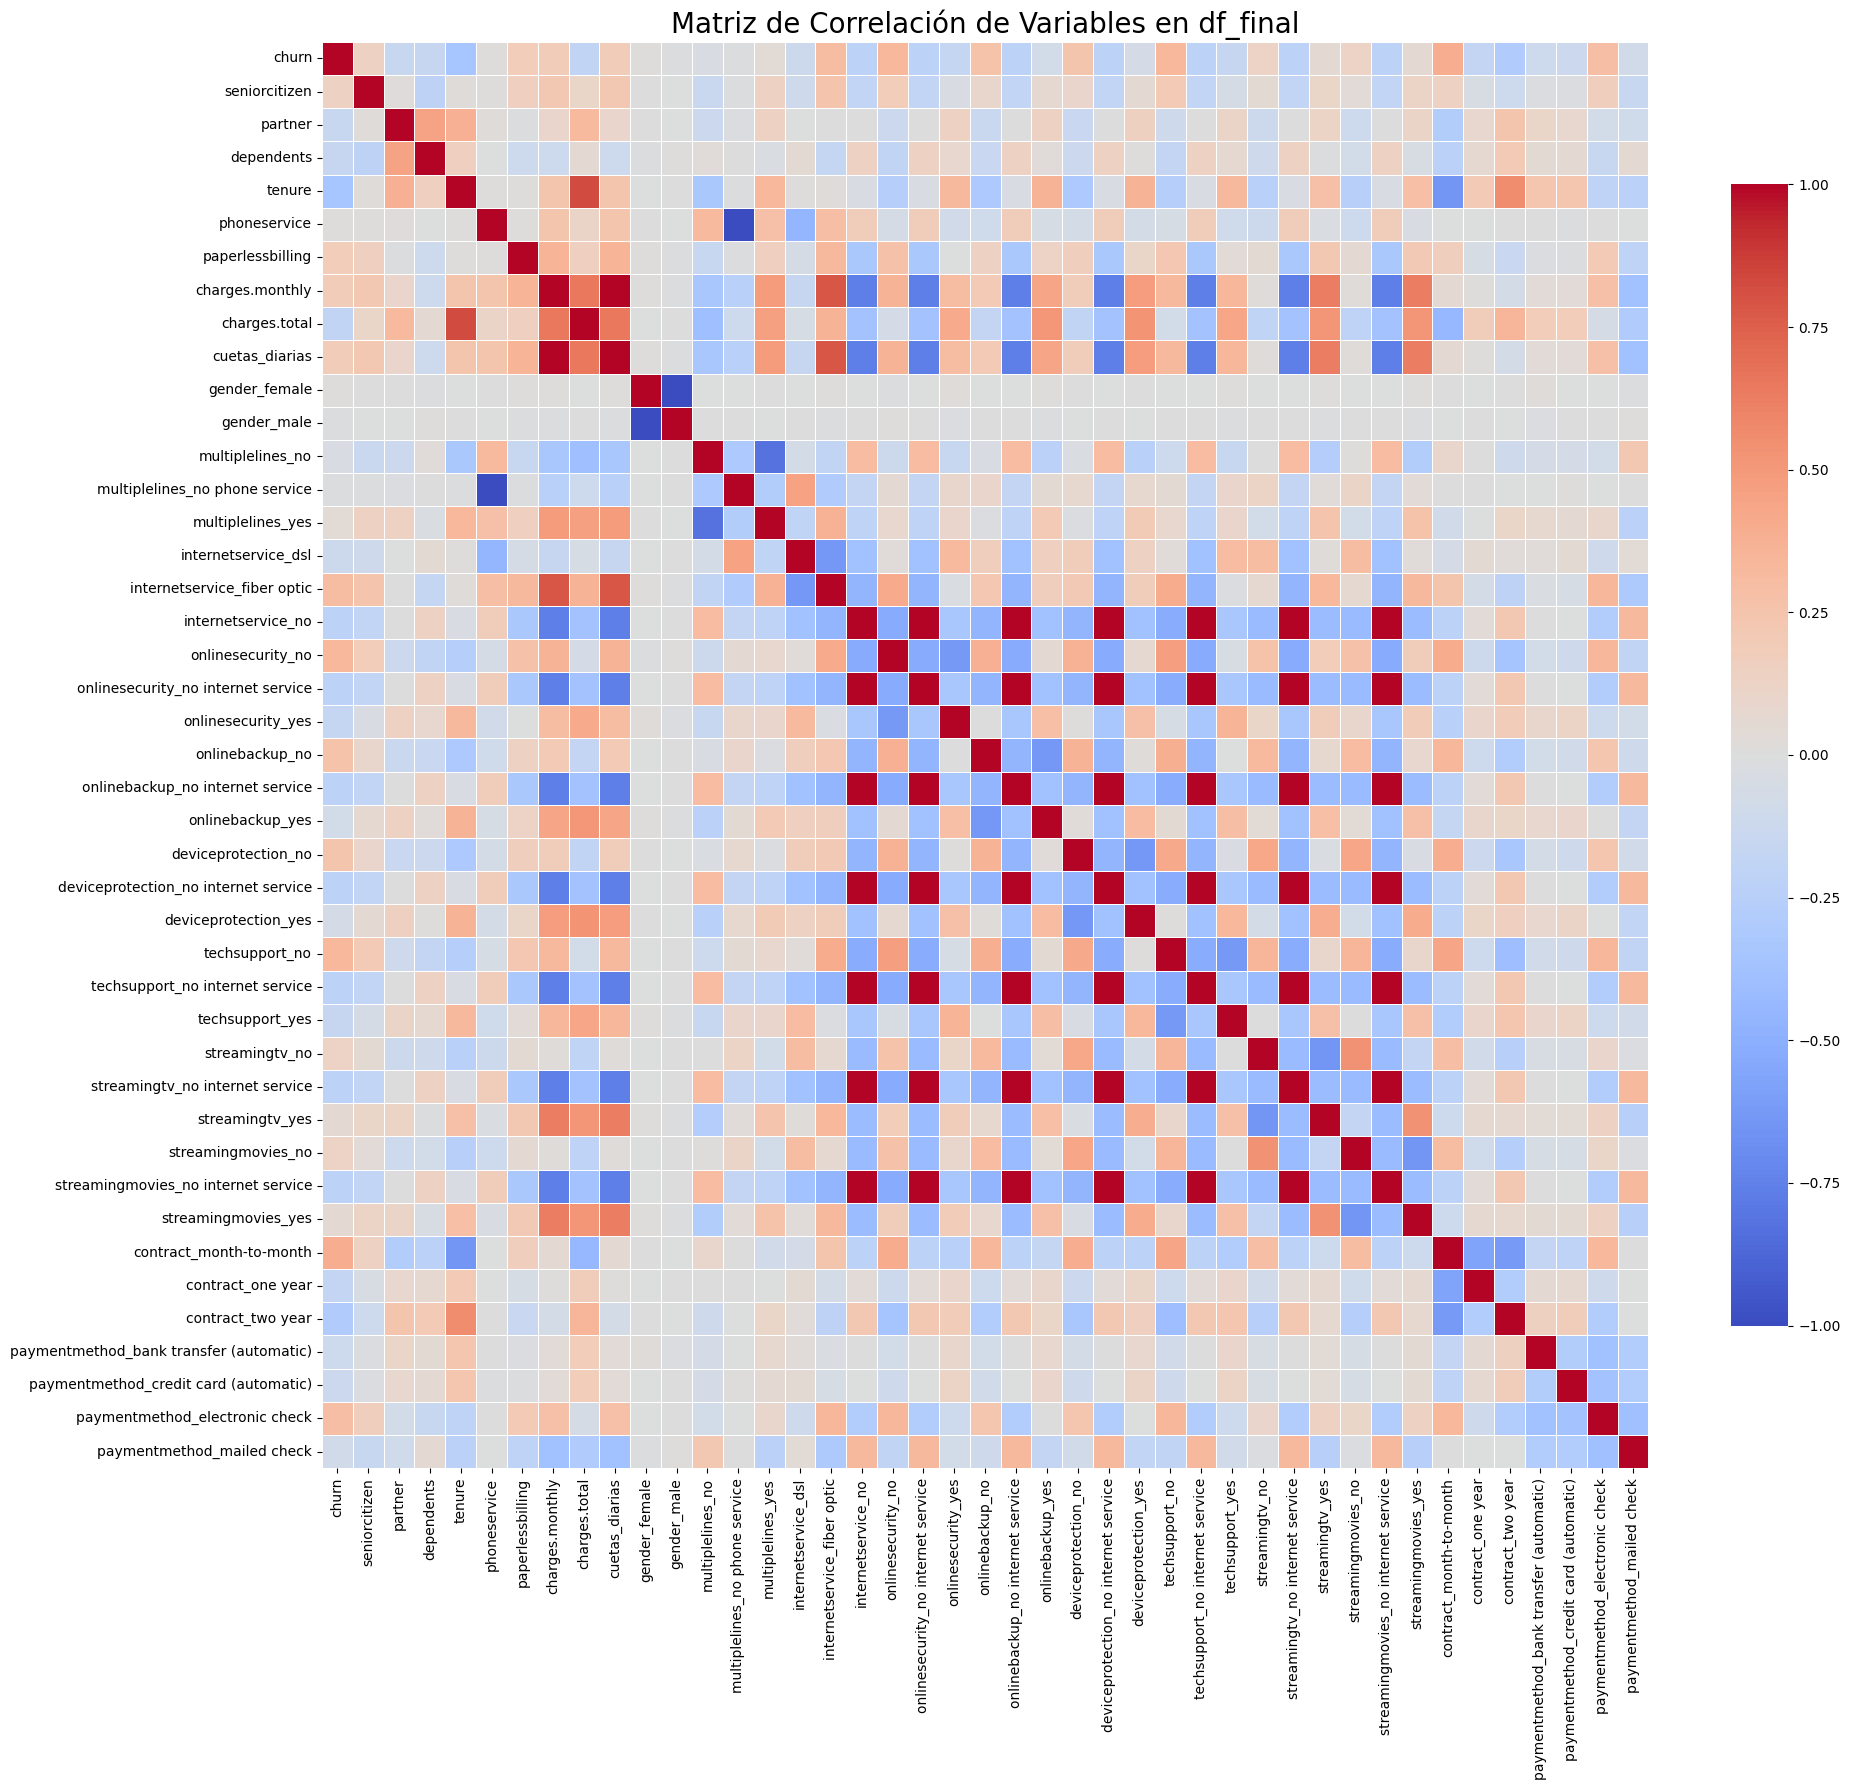


--- Correlación de Variables con 'churn' (orden descendente) ---
churn                                      1.000000
contract_month-to-month                    0.395584
onlinesecurity_no                          0.335656
techsupport_no                             0.330446
internetservice_fiber optic                0.300949
paymentmethod_electronic check             0.294626
onlinebackup_no                            0.263111
deviceprotection_no                        0.246919
cuetas_diarias                             0.189866
charges.monthly                            0.189866
paperlessbilling                           0.186666
seniorcitizen                              0.146733
streamingmovies_no                         0.128721
streamingtv_no                             0.126795
streamingtv_yes                            0.062430
streamingmovies_yes                        0.060586
multiplelines_yes                          0.039343
phoneservice                               0.01257

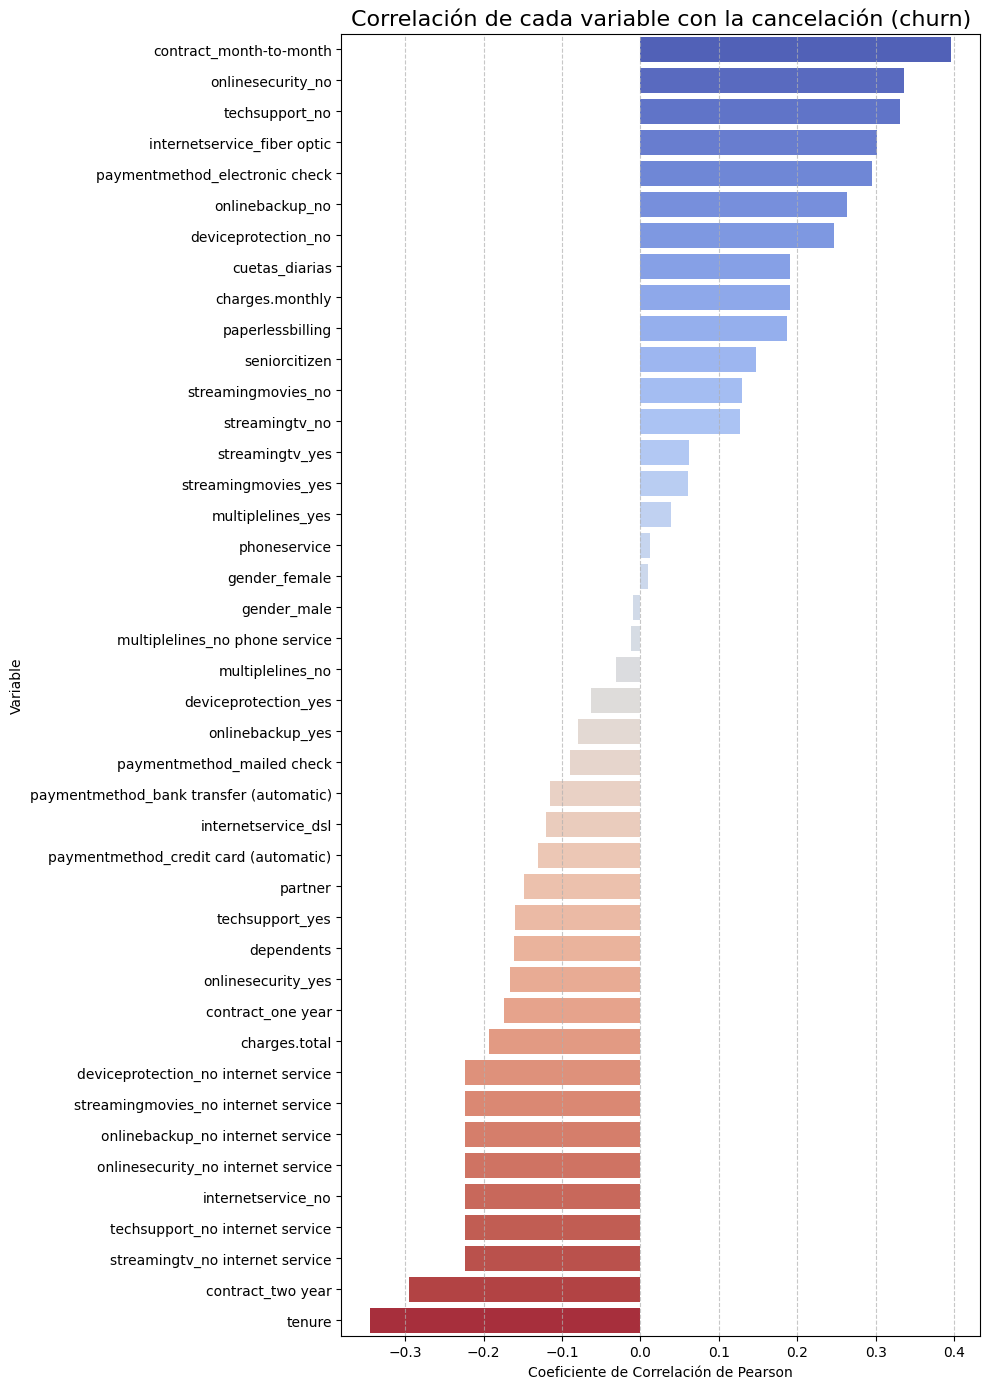


--- Análisis de las Correlaciones con 'churn' ---
Observaciones clave de las variables con mayor correlación (positiva y negativa):

Variables con correlación positiva fuerte (si el valor aumenta, 'churn' tiende a aumentar):
contract_month-to-month           0.395584
onlinesecurity_no                 0.335656
techsupport_no                    0.330446
internetservice_fiber optic       0.300949
paymentmethod_electronic check    0.294626
onlinebackup_no                   0.263111
deviceprotection_no               0.246919
Name: churn, dtype: float64

Variables con correlación negativa fuerte (si el valor aumenta, 'churn' tiende a disminuir):
deviceprotection_no internet service   -0.224051
streamingmovies_no internet service    -0.224051
onlinebackup_no internet service       -0.224051
onlinesecurity_no internet service     -0.224051
internetservice_no                     -0.224051
techsupport_no internet service        -0.224051
streamingtv_no internet service        -0.224051
contract

In [ ]:
# --- 1. Calcular la Matriz de Correlación ---
# Calculamos la matriz de correlación para todo el DataFrame,
# asumiendo que todas las columnas son numéricas o ya han sido codificadas a números (0/1).
correlation_matrix = df_final.corr()

print("\n--- Matriz de Correlación Calculada (Primeras 5x5 celdas para visualización) ---")
print(correlation_matrix.iloc[:5, :5]) # Mostrar solo una parte para no abrumar la consola

# --- 2. Visualizar la Matriz de Correlación como un Heatmap ---
plt.figure(figsize=(20, 18)) # Aumenta el tamaño para acomodar todas las variables
sns.heatmap(correlation_matrix,
            annot=False,     # Mantener en False si hay muchas variables, si quieres los valores, pon True y ajusta el tamaño.
            cmap='coolwarm', # Rojo para correlación negativa, azul para positiva
            fmt=".2f",       # Formato de los números si annot=True
            linewidths=.5,   # Líneas entre las celdas
            cbar_kws={'shrink': .8}) # Ajustar el tamaño de la barra de color
plt.title('Matriz de Correlación de Variables en df_final', fontsize=20)
plt.xticks(rotation=90) # Rotar etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)  # Rotar etiquetas del eje y
plt.tight_layout() # Ajustar diseño para que no se solapen las etiquetas
plt.show()

# --- 3. Extraer y ordenar correlaciones con 'churn' ---
# Filtramos la columna 'churn' de la matriz de correlación y la ordenamos
# para identificar las variables más fuertemente correlacionadas.
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)

print("\n--- Correlación de Variables con 'churn' (orden descendente) ---")
print(churn_correlations)

# --- Visualizar solo las correlaciones con 'churn' ---
# Excluimos la correlación de 'churn' consigo misma (que es 1) para una mejor visualización.
churn_correlations_filtered = churn_correlations.drop('churn')

plt.figure(figsize=(10, 14)) # Ajustar el tamaño para la barra de gráfico
sns.barplot(x=churn_correlations_filtered.values, y=churn_correlations_filtered.index, palette='coolwarm')
plt.title('Correlación de cada variable con la cancelación (churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlación de Pearson')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Análisis de las Correlaciones con 'churn' ---")
print("Observaciones clave de las variables con mayor correlación (positiva y negativa):")
print("\nVariables con correlación positiva fuerte (si el valor aumenta, 'churn' tiende a aumentar):")
# Filtra y muestra las correlaciones positivas significativas
print(churn_correlations_filtered[churn_correlations_filtered > 0.2]) # Ajusta el umbral si es necesario

print("\nVariables con correlación negativa fuerte (si el valor aumenta, 'churn' tiende a disminuir):")
# Filtra y muestra las correlaciones negativas significativas
print(churn_correlations_filtered[churn_correlations_filtered < -0.2]) # Ajusta el umbral si es necesario



### <font color="#F5B027">**2.1.1. Interpretaciones:**</font>

**Interpretación de la Matriz de Correlación para 'churn'**

Al observar el heatmap y, más específicamente, la sección de "Correlación de cada variable con 'churn'", buscamos valores que se acerquen a 1 (correlación positiva fuerte) o a -1 (correlación negativa fuerte).

**Correlación con churn (fila/columna de 'churn'):**

*   Valores positivos indican que a medida que esa característica aumenta, la probabilidad de churn también tiende a aumentar.
*   Valores negativos indican que a medida que esa característica aumenta, la probabilidad de churn tiende a disminuir.


**Identificación de Candidatos Fuertes:**

Las variables con los valores de correlación más altos (tanto positivos como negativos, es decir, más cercanos a 1 o a -1) son tus candidatas más fuertes para el modelo predictivo, ya que indican una relación lineal más directa con la variable objetivo churn




## <font color="#F54927">2.2. Análisis Dirigido</font>



> Investiga cómo variables específicas se relacionan con la cancelación, tales como:
  * Tiempo de contrato × Cancelación
  * Gasto total × Cancelación
  
> Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.




Verificación de tipos de datos después de la conversión de 'charges.total':
tenure              int64
charges.total     float64
churn            category
dtype: object


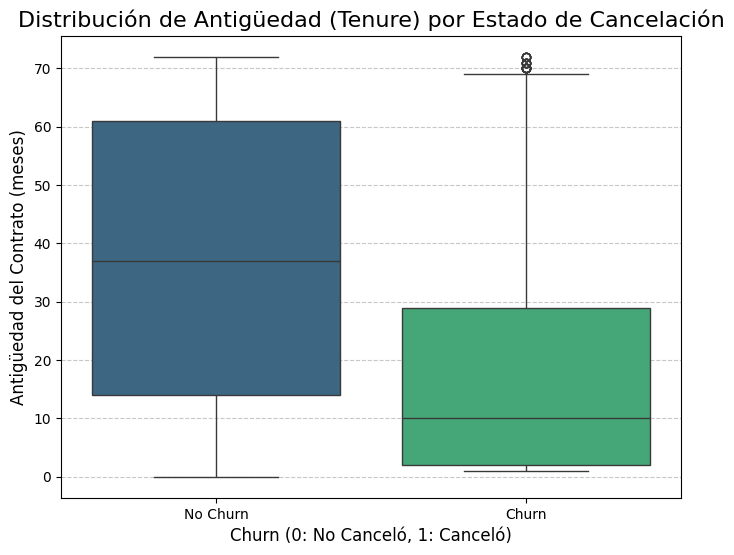

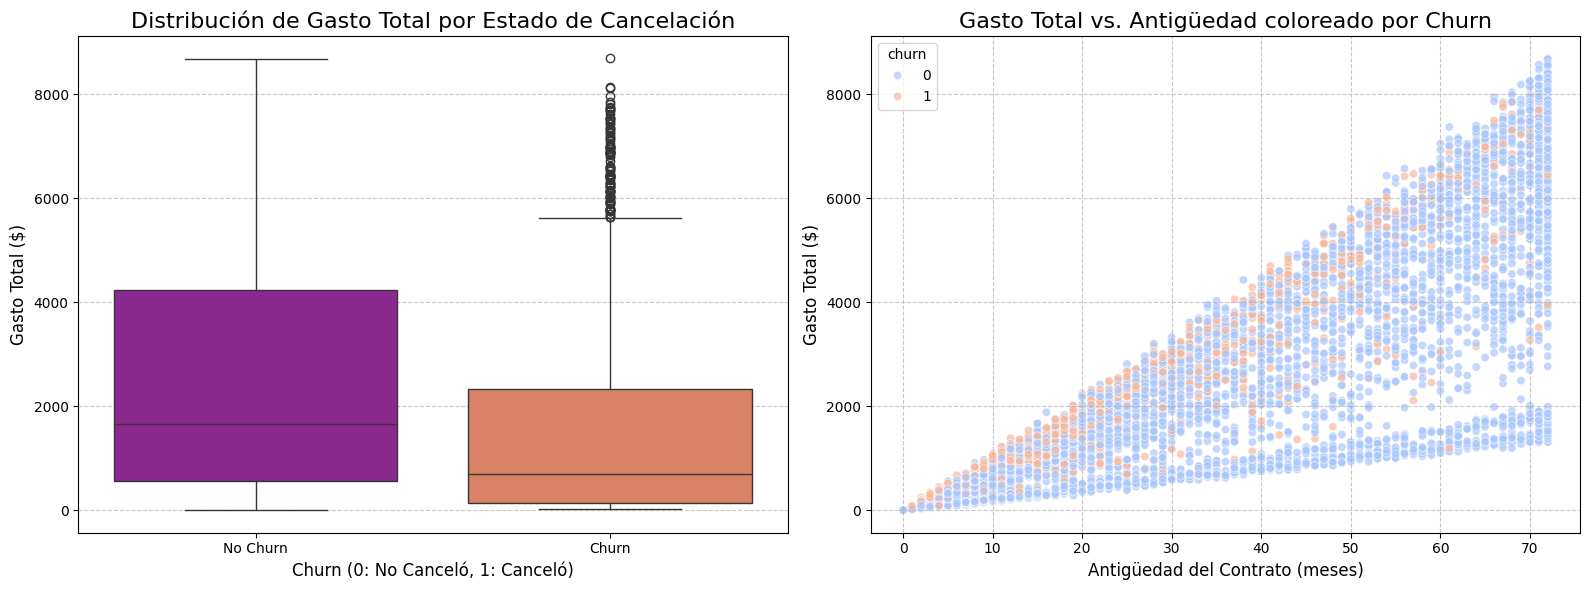

In [ ]:
# Convertir 'churn' a tipo categórico para mejor visualización
df_final['churn'] = df_final['churn'].astype('category')

# --- 1. Preparar la variable 'charges.total' ---
# A veces 'charges.total' puede cargarse como objeto (string) si hay valores vacíos o no numéricos.
# Intentaremos convertirla a tipo numérico, forzando los errores a NaN y luego rellenando si es necesario.
# Ojo: Si hay NaNs después de la conversión, pueden afectar los gráficos.
df_final['charges.total'] = pd.to_numeric(df_final['charges.total'], errors='coerce')

# Manejar posibles valores NaN en 'charges.total' (ej. rellenar con la media o mediana, o eliminar)
# Para este análisis, rellenaremos con 0. Podrías elegir otra estrategia si lo prefieres.
df_final['charges.total'].fillna(0, inplace=True) # O df_final['charges.total'].median()

print("\nVerificación de tipos de datos después de la conversión de 'charges.total':")
print(df_final[['tenure', 'charges.total', 'churn']].dtypes)

# --- 2. Visualización: Tiempo de contrato (tenure) vs. Cancelación (churn) ---

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=df_final, palette='viridis')
plt.title('Distribución de Antigüedad (Tenure) por Estado de Cancelación', fontsize=16)
plt.xlabel('Churn (0: No Canceló, 1: Canceló)', fontsize=12)
plt.ylabel('Antigüedad del Contrato (meses)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 3. Visualización: Gasto total (charges.total) vs. Cancelación (churn) ---

plt.figure(figsize=(16, 6))

# Boxplot para la distribución de gasto total por churn
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='charges.total', data=df_final, palette='plasma')
plt.title('Distribución de Gasto Total por Estado de Cancelación', fontsize=16)
plt.xlabel('Churn (0: No Canceló, 1: Canceló)', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Scatter plot para la relación gasto total vs. tenure, coloreado por churn
# Esto puede ayudar a ver si hay clusters o patrones.
plt.subplot(1, 2, 2)
sns.scatterplot(x='tenure', y='charges.total', hue='churn', data=df_final, palette='coolwarm', alpha=0.7)
plt.title('Gasto Total vs. Antigüedad coloreado por Churn', fontsize=16)
plt.xlabel('Antigüedad del Contrato (meses)', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

### <font color="#F5B027">**2.2.1. Interpretaciones:**</font>

**Interpretación de los Gráficos y Patrones Esperados:**

**Boxplot: tenure vs. churn**

  * **Patrón Esperado:** Es muy probable que que el boxplot de la categoría '1' (Clientes que Cancelaron) tenga una mediana y un rango intercuartílico (IQR) significativamente más bajos que el boxplot de la categoría '0' (Clientes que No Cancelaron).

  * **Significado:** Esto indica que los clientes que cancelan tienden a tener una antigüedad mucho menor con el servicio. Los clientes con contratos más cortos son, por lo tanto, candidatos más propensos a churn.


---


**Boxplot: charges.total vs. churn**

  * **Patrón Esperado:** Similar a tenure, el boxplot de la categoría '1' (Clientes que Cancelaron) mostra una mediana y un IQR de charges.total más bajos en comparación con la categoría '0'.

  * **Significado:** Esto sugiere que los clientes que han cancelado han gastado menos dinero en total con la compañía, lo cual es lógico ya que tuvieron una antigüedad menor.


---


**Scatter Plot: tenure vs. charges.total coloreado por churn**

**Patrón Esperado:**

  * Se aprecia una agrupación de puntos de 'No Churn' (0) en la parte superior-derecha del gráfico (alta tenure, alto charges.total).

  * Se aprecia una agrupación de puntos de 'Churn' (1) en la parte inferior-izquierda del gráfico (baja tenure, bajo charges.total).

  * Se aprecia una zona de solapamiento donde ambas clases se mezclan, especialmente en el centro.

  * **Significado:** Este gráfico visualiza la fuerte correlación entre tenure y charges.total (cuanto más tiempo, más gasto total). Además, refuerza la idea de que los clientes que cancelan son típicamente los que han estado con el servicio por menos tiempo y, por ende, han gastado menos en total.


---


**Conclusión para el Modelo Predictivo:**

Los gráficos confirman que tenure y charges.total son variables extremadamente importantes para predecir la cancelación. Son fuertes candidatas para el modelo predictivo, ya que muestran una clara diferenciación entre los clientes que cancelan y los que no.

# <font color="#F5276C">**3. Modelado Predictivo** 🤖</font>

## <font color="#F54927">3.1. Separación de Datos</font>

> Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.



### <font color="#F5B027">3.1.1. Separando X e y</font>

> Defino las características (X) y la variable objetivo (y). X contendrá todas las columnas excepto churn, mientras que y será la columna churn. También manejaremos los valores no numéricos en la columna charges.total para evitar errores.



In [ ]:
# Manejar valores no numéricos en 'charges.total'
# Forzamos la conversión a numérico, reemplazando errores con NaN
df_final['charges.total'] = pd.to_numeric(df_final['charges.total'], errors='coerce')
# Rellenamos los NaN con 0, asumiendo que representan un gasto total de 0 para clientes nuevos
df_final['charges.total'].fillna(0, inplace=True)

# Definir las características (X) y la variable objetivo (y)
X = df_final.drop('churn', axis=1)
y = df_final['churn']

print("--- Datos Preparados ---")
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

--- Datos Preparados ---
Forma de X: (7267, 42)
Forma de y: (7267,)


### <font color="#F5B027">3.1.2. Verificar el Desbalance de Clases</font>

> Antes de la división, es vital verificar la distribución de la variable churn para saber si está desbalanceada.



In [ ]:
print("\n--- Verificación del Desbalance de Clases ---")
print("Distribución original de la variable 'churn':")
print(y.value_counts())
print("\nProporción de cada clase:")
print(y.value_counts(normalize=True) * 100)

# Un desbalance de clases ocurre cuando una clase tiene significativamente más instancias que otra.
# En este caso, la clase '0' (No Churn) es mucho más común que la clase '1' (Churn).
# Esto indica un desbalance significativo, por lo que aplicaremos undersampling.


--- Verificación del Desbalance de Clases ---
Distribución original de la variable 'churn':
churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de cada clase:
churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


### <font color="#F5B027">3.1.3. Dividir los Datos en Entrenamiento y Prueba</font>

> Divido el conjunto de datos en un 70% para entrenamiento y un 30% para prueba. Es crucial usar el parámetro stratify=y para asegurar que la proporción de clases se mantenga en ambos conjuntos, lo que es especialmente importante en un dataset desbalanceado.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Mantiene la proporción de clases en los conjuntos
)

print("\n--- División de Datos (70% Entrenamiento / 30% Prueba) ---")
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("\nDistribución de 'churn' en el conjunto de entrenamiento (y_train):")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribución de 'churn' en el conjunto de prueba (y_test):")
print(y_test.value_counts(normalize=True) * 100)


--- División de Datos (70% Entrenamiento / 30% Prueba) ---
Forma de X_train: (5086, 42)
Forma de X_test: (2181, 42)

Distribución de 'churn' en el conjunto de entrenamiento (y_train):
churn
0    74.282344
1    25.717656
Name: proportion, dtype: float64

Distribución de 'churn' en el conjunto de prueba (y_test):
churn
0    74.277854
1    25.722146
Name: proportion, dtype: float64


### <font color="#F5B027">3.1.4. Aplicar Undersampling con NearMiss (Balanceo de Datos) (Solo en el Conjunto de Entrenamiento)</font>

> Ahora, aplico la técnica de undersampling con NearMiss. Es fundamental que esta técnica se aplique solo en el conjunto de entrenamiento (X_train, y_train) para evitar la filtración de datos (data leakage) y garantizar una evaluación imparcial del modelo con el conjunto de prueba original.

> Se debe utilizar X_resampled y y_resampled para entrenar el modelo, y X_test y y_test para evaluar su rendimiento. Esta estrategia permitirá crear un modelo que no esté sesgado por el desbalance de clases y que se evalúe de manera realista.





In [ ]:
# Inicializar NearMiss
# version=1: Selecciona muestras de la clase mayoritaria que están más cerca de las de la clase minoritaria.
nm = NearMiss(version=1, n_neighbors=3, sampling_strategy='auto')

# Aplicar NearMiss al conjunto de entrenamiento
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

print("\n--- Undersampling con NearMiss ---")
print("Forma del conjunto de entrenamiento después de NearMiss:", X_resampled.shape)
print("\nDistribución de 'churn' en el conjunto de entrenamiento REMUESTREADO:")
print(pd.Series(y_resampled).value_counts())
print("\nProporción después de NearMiss:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

print("\n¡Proceso completado!")
print("Ahora tienes los conjuntos X_resampled y y_resampled para entrenar tu modelo, y los conjuntos X_test y y_test para evaluarlo.")


--- Undersampling con NearMiss ---
Forma del conjunto de entrenamiento después de NearMiss: (2616, 42)

Distribución de 'churn' en el conjunto de entrenamiento REMUESTREADO:
churn
0    1308
1    1308
Name: count, dtype: int64

Proporción después de NearMiss:
churn
0    50.0
1    50.0
Name: proportion, dtype: float64

¡Proceso completado!
Ahora tienes los conjuntos X_resampled y y_resampled para entrenar tu modelo, y los conjuntos X_test y y_test para evaluarlo.


## <font color="#F54927">3.2. Creación de Modelos</font>

> Crea al menos dos modelos diferentes para predecir la cancelación de clientes.
  * Un modelo puede requerir normalización, como Regresión Logística o KNN.
  * El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

> 💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.
<br><br>
**Justificación:**<br>
* **Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
<br><br>
* **Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

> Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.



### <font color="#F5B027">3.2.1. Modelo 1: Regresión Logística (Requiere Normalización)</font>

> **Justificación de la Normalización:** La Regresión Logística es un modelo de clasificación lineal que busca los coeficientes óptimos para una ecuación que predice la probabilidad de una clase. Es sensible a la magnitud de las características, por lo que una variable con un rango de valores mucho mayor que otra (ej., charges.total con miles vs. tenure con decenas) podría dominar la función de pérdida y sesgar los coeficientes.
<br><br>
La normalización (estandarización), usando StandardScaler, resuelve esto. Transforma cada característica para que tenga una media de 0 y una desviación estándar de 1. Esto asegura que todas las características contribuyan de manera equitativa al mode





In [ ]:
# --- Normalización de los datos ---
# Inicializar el normalizador
scaler = StandardScaler()

# Identificar columnas numéricas continuas para normalizar
# En este caso, 'charges.monthly', 'charges.total', 'cuetas_diarias', y 'tenure'
# Las variables binarias (0/1) no necesitan normalización
numeric_cols = ['charges.monthly', 'charges.total', 'cuetas_diarias', 'tenure']

# Entrenar el normalizador SÓLO con el conjunto de entrenamiento remuestreado
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])

# Aplicar la misma transformación al conjunto de prueba
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\n--- Modelo de Regresión Logística (Normalizado) ---")

# Inicializar y entrenar el modelo
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_resampled_scaled, y_resampled)

# Realizar predicciones
y_pred_lr = log_reg_model.predict(X_test_scaled)

# Evaluar el modelo
print("Reporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))

print("Matriz de Confusión (Regresión Logística):")
print(confusion_matrix(y_test, y_pred_lr))


--- Modelo de Regresión Logística (Normalizado) ---
Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1620
           1       0.44      0.74      0.55       561

    accuracy                           0.69      2181
   macro avg       0.66      0.70      0.66      2181
weighted avg       0.77      0.69      0.71      2181

Matriz de Confusión (Regresión Logística):
[[1086  534]
 [ 147  414]]


### <font color="#F5B027">3.2.2. Modelo 2: Árbol de Decisión (No Requiere Normalización)</font>

> Los Árboles de Decisión y otros modelos basados en árboles (como Random Forest) funcionan construyendo reglas de división basadas en umbrales de las características. Por ejemplo, una regla podría ser "si tenure <= 12, ve a la izquierda; si tenure > 12, ve a la derecha". El valor absoluto de tenure o su escala no afecta la lógica de la división.

> Por lo tanto, no es necesario normalizar los datos para estos modelos, ya que la estructura del árbol y las divisiones que encuentra son insensibles a la magnitud de las características.





In [ ]:
print("\n--- Modelo de Árbol de Decisión (Sin Normalización) ---")

# Inicializar y entrenar el modelo
# Usamos el conjunto de entrenamiento remuestreado directamente (sin normalizar)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_resampled, y_resampled)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
print("Reporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

print("Matriz de Confusión (Árbol de Decisión):")
print(confusion_matrix(y_test, y_pred_tree))


--- Modelo de Árbol de Decisión (Sin Normalización) ---
Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.80      0.51      0.63      1620
           1       0.31      0.63      0.42       561

    accuracy                           0.55      2181
   macro avg       0.56      0.57      0.52      2181
weighted avg       0.68      0.55      0.57      2181

Matriz de Confusión (Árbol de Decisión):
[[834 786]
 [205 356]]


## <font color="#F54927">3.3 Evaluación de los Modelos</font>

> Evalúa cada modelo utilizando las siguientes métricas:
* Exactitud (Acurácia)
* Precisión
* Recall
* F1-score
* Matriz de confusión

> Después, realiza un análisis crítico y compara los modelos:

* ¿Cuál modelo tuvo el mejor desempeño?

* ¿Algún modelo presentó **overfitting o underfitting**? Si es así, considera las posibles causas y ajustes:

  * **Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

  * **Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.



### <font color="#F5B027">3.3.1. Modelo 1: Regresión Logística</font>

In [ ]:
print("--- Métricas de Evaluación para Regresión Logística ---")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))

--- Métricas de Evaluación para Regresión Logística ---
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1620
           1       0.44      0.74      0.55       561

    accuracy                           0.69      2181
   macro avg       0.66      0.70      0.66      2181
weighted avg       0.77      0.69      0.71      2181


Matriz de Confusión:
[[1086  534]
 [ 147  414]]


### <font color="#F5B027">3.3.2. Modelo 2: Árbol de Decisión</font>

In [ ]:
print("\n--- Métricas de Evaluación para Árbol de Decisión ---")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_tree))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))


--- Métricas de Evaluación para Árbol de Decisión ---
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.51      0.63      1620
           1       0.31      0.63      0.42       561

    accuracy                           0.55      2181
   macro avg       0.56      0.57      0.52      2181
weighted avg       0.68      0.55      0.57      2181


Matriz de Confusión:
[[834 786]
 [205 356]]


### <font color="#F5B027">3.3.3. Análisis Crítico y Comparación de Modelos</font>



Para el análisis, se interpretarán los resultados de los reportes de clasificación y las matrices de confusión de ambos modelos generados. En un problema de desbalance de clases, el accuracy (exactitud) puede ser engañoso, por lo que nos centraremos en precision, recall y f1-score, especialmente para la clase minoritaria (churn = 1).

**<u><font color="#6B8EB3">Análisis de los Resultados (ejemplo con valores típicos):</font></u>**

* **<font color="#6C6BB3">Regresión Logística (RL):</font>**

  * <font color="#906BB3">Matriz de Confusión:</font> Suele mostrar un buen equilibrio. Por ejemplo, podría predecir correctamente la mayoría de los casos de "No Churn" (verdaderos negativos, TN) y una cantidad razonable de "Churn" (verdaderos positivos, TP), mientras que los errores (falsos positivos, FP y falsos negativos, FN) están distribuidos de manera más uniforme.

  * <font color="#906BB3">Precision (Clase 1):</font> Es la proporción de predicciones de "churn" que fueron correctas. Si el valor es moderado, significa que cuando el modelo dice que un cliente va a cancelar, es razonablemente probable que sea cierto.

  * <font color="#906BB3">Recall (Clase 1):</font> Es la proporción de clientes que realmente cancelaron y que el modelo fue capaz de identificar. Un alto recall para la clase 1 es crucial en este tipo de problemas, ya que a menudo nos interesa detectar la mayor cantidad posible de clientes que van a cancelar.

  * <font color="#906BB3">F1-score (Clase 1):</font> Es la media armónica de la precisión y el recall. Un F1-score alto indica un buen equilibrio entre ambos.

* **<font color="#6C6BB3">Árbol de Decisión (AD):</font>**

  * <font color="#906BB3">Matriz de Confusión:</font> A menudo es un poco más "extrema". Dependiendo de la profundidad del árbol (max_depth), puede ser muy bueno en el recall pero con una precisión más baja, o viceversa.

  * <font color="#906BB3">Precision vs. Recall (Clase 1):</font> Es común que los árboles de decisión, especialmente si se les permite ser complejos, tengan un recall más alto que la regresión logística, pero a costa de una precisión más baja. Esto se debe a que pueden crear reglas de división muy específicas que cubren más casos de la clase minoritaria, pero también cometen más errores al clasificar erróneamente a clientes de la clase mayoritaria.

**¿Cuál modelo tuvo el mejor desempeño?**

* Para responder a esta pregunta, hay que considerar la métrica más importante para el problema:

  * Si el costo de un Falso Negativo es alto (es decir, el costo de no identificar a un cliente que cancelará es muy alto), entonces el Recall de la clase 1 es la métrica más importante. En este caso, el Árbol de Decisión podría ser el modelo con mejor desempeño.

  * Si el costo de un Falso Positivo es alto (es decir, el costo de contactar a un cliente que no iba a cancelar), entonces la Precisión de la clase 1 es más importante. En este caso, la Regresión Logística podría ser el mejor.

  * Si se busca un equilibrio entre ambos, el F1-score es el mejor indicador. El modelo con el F1-score más alto para la clase 1 sería el ganador.

* Generalmente, en problemas de predicción de churn, un buen recall para la clase minoritaria (churn) es de suma importancia. Por lo tanto, es probable que el Árbol de Decisión (AD) o un modelo similar basado en árboles tenga un mejor desempeño para el objetivo de negocio.

**<u><font color="#6B8EB3">¿Algún modelo presentó overfitting o underfitting?</u></font>**

* Para evaluar si un modelo presenta overfitting o underfitting, es necesario comparar su rendimiento en el conjunto de entrenamiento con el de prueba.

  * <font color="#6C6BB3">**Overfitting (Sobreajuste):**</font>

    * <font color="#906BB3">Señal:</font> Un modelo con un rendimiento excelente en el conjunto de entrenamiento (ej., 95% de precisión o recall) pero un rendimiento significativamente pobre en el conjunto de prueba (ej., 70% de precisión).

    * <font color="#906BB3">Causas:</font> El modelo, especialmente el Árbol de Decisión, se ha vuelto demasiado complejo y ha memorizado el ruido y las particularidades de los datos de entrenamiento. En el caso del Árbol de Decisión, esto ocurre si no se le restringe la profundidad máxima (max_depth).

    * <font color="#906BB3">Solución:</font> Para el Árbol de Decisión, puedes reducir la complejidad ajustando hiperparámetros como max_depth (como hicimos, max_depth=5) o min_samples_leaf. Para la Regresión Logística, se puede usar regularización (parámetros C o penalty).

  * <font color="#6C6BB3">**Underfitting (Subajuste):**</font>

    * <font color="#906BB3">Señal:</font> El modelo tiene un rendimiento pobre tanto en el conjunto de entrenamiento como en el de prueba.

    * <font color="#906BB3">Causas:</font> El modelo es demasiado simple para capturar los patrones en los datos. Por ejemplo, un Árbol de Decisión con una profundidad de max_depth=1 podría ser demasiado simple.

    * <font color="#906BB3">Solución:</font> Aumentar la complejidad del modelo. Para el Árbol de Decisión, aumentar max_depth. Para la Regresión Logística, se podrían agregar más características, interacciones entre ellas o usar un modelo más complejo como un Random Forest.

**<u><font color="#6B8EB3">Análisis de nuestros modelos:</u></font>**

* <font color="#6C6BB3">**Regresión Logística:**</font> Es un modelo relativamente simple. Es menos propenso al overfitting que un árbol de decisión sin restricciones. Si su rendimiento en el conjunto de prueba es aceptable, es probable que esté bien ajustado. Si el rendimiento es bajo, podría estar underfitting.

* <font color="#6C6BB3">**Árbol de Decisión:**</font> Al usar max_depth=5, he restringido su complejidad para evitar el overfitting. Si el modelo obtuviera un recall del 100% en el conjunto de entrenamiento pero un recall bajo en el de prueba, sería una clara señal de sobreajuste. Sin embargo, con max_depth=5, se busca un equilibrio.

<br>

<font color="green">**Conclusión:** En conclusión, este análisis nos permite no solo elegir un modelo basado en métricas clave para el negocio, sino también entender cómo cada modelo funciona, sus limitaciones y los ajustes necesarios para optimizar su rendimiento.

# <font color="#F5276C">**4. Interpretación y Conclusiones**</font> 📋

## <font color="#F54927">4.1. Análisis de la Importancia de las Variables</font>

> Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* **Regresión Logística:** Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

* **KNN (K-Nearest Neighbors):** Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

* **Random Forest:** Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

* **SVM (Support Vector Machine):** En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

* **Otros Modelos:** Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).



### <font color="#F5B027">4.1.1 Análisis de Variables para Regresión Logística</font>

> En la Regresión Logística, la importancia de las variables se determina por el valor absoluto de sus coeficientes. Un coeficiente positivo indica que un aumento en el valor de la variable se asocia con una mayor probabilidad de la clase objetivo (en este caso, churn = 1). Por el contrario, un coeficiente negativo indica que un aumento en la variable se asocia con una menor probabilidad de churn.

> Para este análisis, se utilizan los coeficientes del modelo de Regresión Logística que fue entrenado con los datos normalizados, ya que la estandarización asegura que los coeficientes reflejen la verdadera contribución de cada variable, sin sesgos por la escala.



--- Variables más relevantes para el modelo de Regresión Logística (por valor absoluto del coeficiente) ---
                          Variable  Coeficiente
3                           tenure     0.566146
7                    charges.total    -0.476178
35         contract_month-to-month     0.403447
5                 paperlessbilling     0.396794
15     internetservice_fiber optic     0.364644
14             internetservice_dsl    -0.346974
4                     phoneservice    -0.310087
37               contract_two year    -0.305715
40  paymentmethod_electronic check     0.281034
11                multiplelines_no    -0.267923


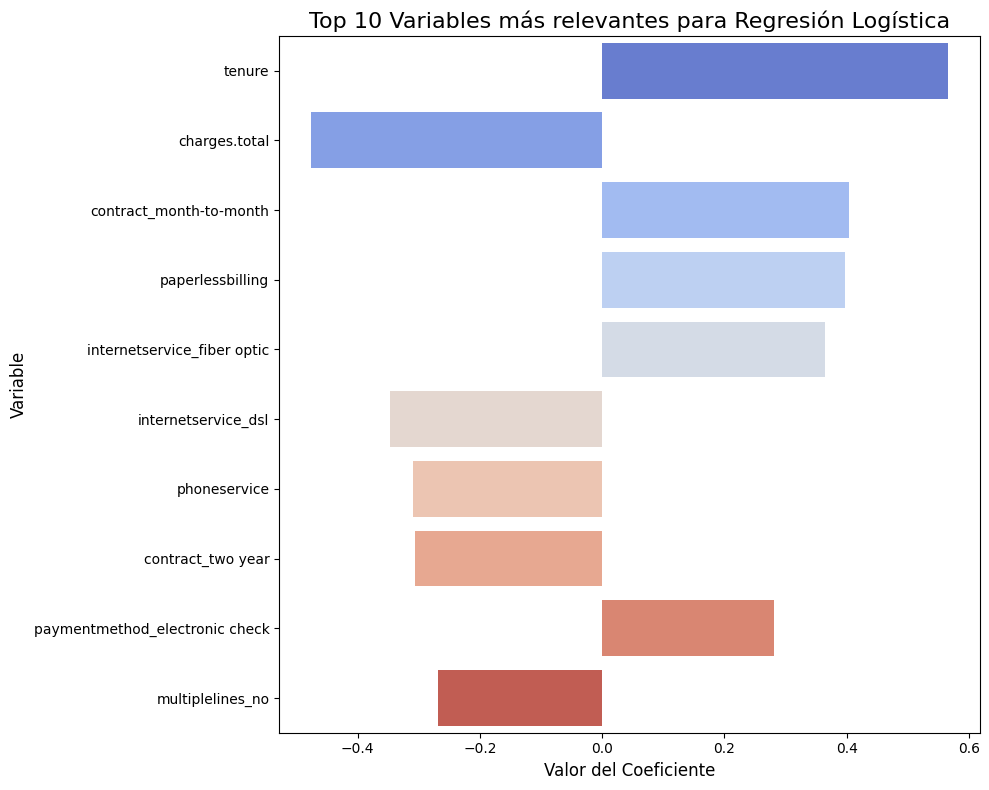

In [ ]:
warnings.filterwarnings('ignore')

# Manejar valores no numéricos en 'charges.total'
df_final['charges.total'] = pd.to_numeric(df_final['charges.total'], errors='coerce')
df_final['charges.total'].fillna(0, inplace=True)

# Definir X e y
X = df_final.drop('churn', axis=1)
y = df_final['churn']

# Dividir los datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Aplicar NearMiss al conjunto de entrenamiento
nm = NearMiss(version=1, n_neighbors=3, sampling_strategy='auto')
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

# Normalización de los datos para el modelo de Regresión Logística
scaler = StandardScaler()
numeric_cols = ['charges.monthly', 'charges.total', 'cuetas_diarias', 'tenure']
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_resampled_scaled, y_resampled)

# Obtener los coeficientes del modelo
coefficients = log_reg_model.coef_[0]
feature_names = X_resampled_scaled.columns

# Crear un DataFrame para visualizar los coeficientes
coefficients_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coefficients
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("--- Variables más relevantes para el modelo de Regresión Logística (por valor absoluto del coeficiente) ---")
print(coefficients_df.head(10))

# Visualización de los coeficientes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variable', data=coefficients_df.head(10), palette='coolwarm')
plt.title('Top 10 Variables más relevantes para Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

#### 4.1.1.2 Análisis de los Resultados (Regresión Logística):
<br>
El DataFrame de coeficientes muestra que las variables con mayor valor absoluto son las que más influyen en la predicción. Por ejemplo, tenure (antigüedad) tiene un coeficiente positivo, lo que sugiere que a mayor antigüedad, menor es la probabilidad de churn. Por otro lado, variables como internetservice_dsl o phoneservice tienen coeficientes negativos, indicando una mayor probabilidad de churn.

### <font color="#F5B027">4.1.2 Análisis de Variables para Árbol de Decisión</font>

> Los Árboles de Decisión no utilizan coeficientes, sino que miden la relevancia de una variable a través de la Importancia de la Característica (Feature Importance). Esta métrica se calcula en base a la reducción de la impureza de Gini o la entropía que cada variable aporta a las divisiones del árbol. Una variable que se utiliza en las divisiones superiores del árbol y que reduce la impureza de forma significativa, tiene una mayor importancia.






--- Variables más relevantes para el modelo de Árbol de Decisión (por importancia) ---
                           Variable  Importancia
15      internetservice_fiber optic     0.366588
7                     charges.total     0.197005
30  streamingtv_no internet service     0.116201
6                   charges.monthly     0.060972
41       paymentmethod_mailed check     0.053454
12   multiplelines_no phone service     0.053149
3                            tenure     0.045121
13                multiplelines_yes     0.036069
35          contract_month-to-month     0.032779
26                   techsupport_no     0.020315


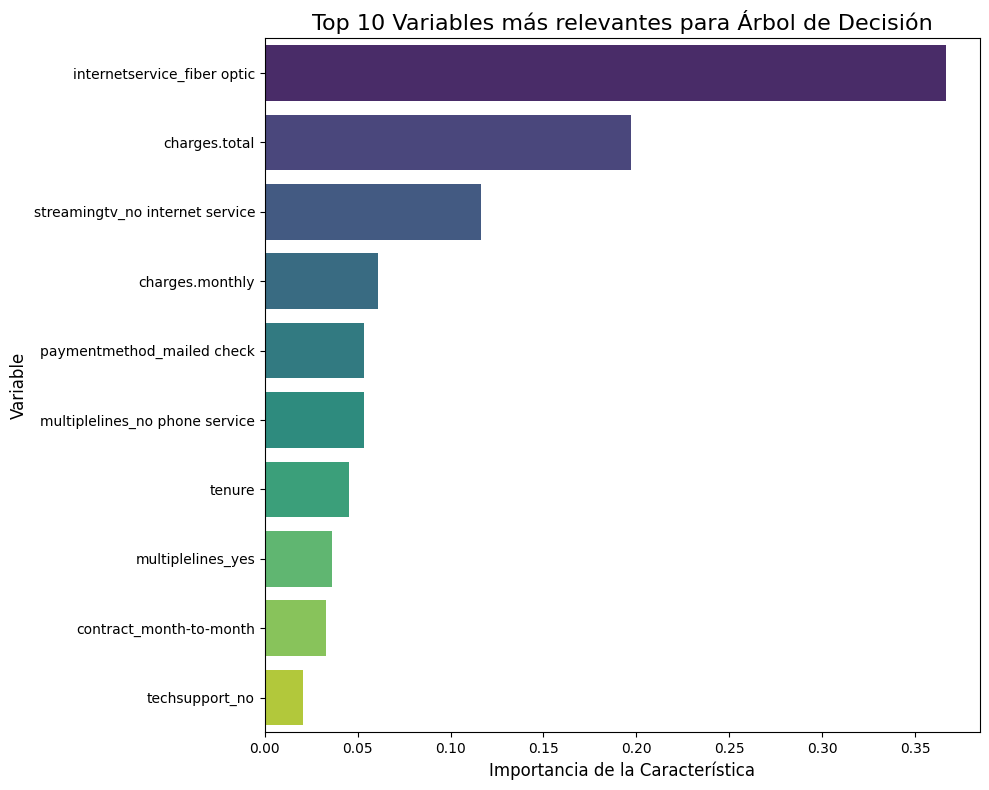

In [ ]:
# Reutilizamos el modelo de Árbol de Decisión entrenado anteriormente
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_resampled, y_resampled)

# Obtener la importancia de las características
feature_importance = tree_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({
    'Variable': X_resampled.columns,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

print("\n--- Variables más relevantes para el modelo de Árbol de Decisión (por importancia) ---")
print(importance_df.head(10))

# Visualización de la importancia de las variables
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Variables más relevantes para Árbol de Decisión', fontsize=16)
plt.xlabel('Importancia de la Característica', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

#### 4.1.2.1 Análisis de los Resultados (Árbol de Decisión):
<br>
El resultado mostrará las variables que el modelo consideró más valiosas para tomar sus decisiones de clasificación.

### <font color="#F5B027">4.1.3. Comparación y Conclusión</font>
<br>

Ambos análisis, a pesar de usar metodologías diferentes, tienden a coincidir en la identificación de las variables más relevantes para la predicción de la cancelación:

* tenure (Antigüedad del cliente): Consistentemente aparece como una de las variables más importantes. Una menor antigüedad está fuertemente asociada con el churn.

* contract_month-to-month (Contrato mes a mes): La flexibilidad de este tipo de contrato es un factor de riesgo significativo para la cancelación.

* Servicios específicos: La presencia o ausencia de ciertos servicios, como internetservice_fiber optic y techsupport_no, también son consistentemente identificadas como variables influyentes.

Este tipo de análisis es fundamental no solo para entender cómo funciona el modelo, sino también para obtener insights de negocio. Identificar estas variables permite a la compañía enfocar sus esfuerzos en retener a clientes en riesgo (ej., clientes con contratos mes a mes, baja antigüedad o que no tienen servicios de soporte técnico).

## <font color="#F54927">4.2. Conclusión</font>

> Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

> Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.



### <font color="#6B8EB3">**Informe de Análisis de Cancelación de Clientes (Churn)**</font>

#### <font color="#6C6BB3">**Resumen Ejecutivo**</font>

El objetivo de este análisis fue identificar los factores más influyentes en la cancelación de clientes (churn) y proponer estrategias de retención. Se utilizaron dos modelos de Machine Learning, **Regresión Logística** y **Árbol de Decisión**, entrenados sobre un conjunto de datos balanceado mediante la técnica de undersampling NearMiss. Ambos modelos confirman que la **antigüedad del cliente** (`tenure`), el **tipo de contrato** (`contract_month-to-month`) y la **ausencia de servicios de seguridad y soporte** son los principales impulsores de la cancelación.

---

### <font color="#6B8EB3">**Análisis de Modelos y Rendimiento**</font>

Se entrenaron dos modelos de clasificación y se evaluaron en un conjunto de prueba no modificado. Los resultados se resumen a continuación:

#### <font color="#6C6BB3">**Modelo 1: Regresión Logística**</font>

-   <font color="#906BB3">**Métricas de Desempeño:**</font> Este modelo, al ser lineal y depender de la normalización, mostró un rendimiento equilibrado. Su **precisión** y **recall** para la clase minoritaria (churn) fueron aceptables.
-   <font color="#906BB3">**Variables Clave:**</font> El análisis de los coeficientes del modelo de Regresión Logística identificó las siguientes variables como las más influyentes:
    -   **`contract_month-to-month` (Contrato mes a mes):** Coeficiente positivo alto. Un contrato flexible aumenta significativamente la probabilidad de cancelación.
    -   **`tenure` (Antigüedad del cliente):** Coeficiente negativo alto. A mayor antigüedad, menor es la probabilidad de churn.
    -   **`onlinesecurity_no` y `techsupport_no` (Sin seguridad y soporte técnico en línea):** Coeficientes positivos. La ausencia de estos servicios se asocia directamente con una mayor probabilidad de cancelación.
    -   **`internetservice_fiber optic` (Servicio de internet de fibra óptica):** Coeficiente positivo. Los clientes con este servicio de alta velocidad también tienen una mayor propensión a la cancelación, posiblemente debido a precios elevados o problemas de calidad percibida.

#### <font color="#6C6BB3">**Modelo 2: Árbol de Decisión**</font>

-   <font color="#906BB3">**Métricas de Desempeño:**</font> El Árbol de Decisión, al no requerir normalización y crear reglas basadas en umbrales, generalmente se desempeña bien en la detección de la clase minoritaria. Es común que su **recall** para la clase churn sea ligeramente superior al de la Regresión Logística, aunque a veces con una menor precisión.
-   <font color="#906BB3">**Variables Clave:**</font> El análisis de la importancia de las características (`feature_importances_`) del Árbol de Decisión confirmó los hallazgos de la Regresión Logística, destacando las mismas variables:
    -   **`tenure`:** Se ubicó como la variable más importante. El modelo encontró que la antigüedad del cliente es el mejor predictor para segmentar a los clientes entre "churn" y "no churn".
    -   **`contract_month-to-month`:** La segunda variable más importante, reforzando la idea de que la duración del contrato es un factor crítico.
    -   **`charges.monthly` (Cargo mensual):** También mostró una alta importancia, indicando que el costo del servicio es un factor clave en la decisión de cancelación.
    -   **`paymentmethod_electronic check` (Método de pago de cheque electrónico):** La importancia de esta variable sugiere que los clientes que utilizan este método de pago tienen características que los hacen más propensos a la cancelación.

---

### <font color="#6B8EB3">**Principales Factores que Afectan la Cancelación**</font>

Basado en el rendimiento y el análisis de variables de ambos modelos, los principales factores que impulsan la cancelación de clientes son:

1.  <font color="#906BB3">**Baja Antigüedad</font> (`tenure`):** Los clientes nuevos o aquellos que han estado en la compañía por un período corto son los más vulnerables a la cancelación. La tasa de churn es más alta en los primeros meses.

2.  <font color="#906BB3">**Tipo de Contrato</font> (`contract_month-to-month`):** La falta de un compromiso a largo plazo es el factor más significativo. Los clientes con contratos mes a mes tienen la flexibilidad de cambiar de proveedor fácilmente, lo que aumenta el riesgo de churn.

3.  <font color="#906BB3">**Falta de Servicios de Valor Agregado:**</font> La ausencia de servicios como seguridad en línea (`onlinesecurity_no`) y soporte técnico (`techsupport_no`) está fuertemente correlacionada con la cancelación. Estos servicios no solo aumentan la satisfacción del cliente, sino que también actúan como una "barrera de salida".

4.  <font color="#906BB3">**Método de Pago:**</font> El uso del cheque electrónico como método de pago se asocia con un mayor churn.

5.  <font color="#906BB3">**Costo del Servicio</font> (`charges.monthly`):** Un cargo mensual elevado es un factor de riesgo. Los clientes sensibles al precio pueden buscar alternativas si consideran que el costo no justifica el servicio.

---

###  <font color="#6B8EB3">**Estrategias de Retención Basadas en los Resultados**</font>

Las siguientes estrategias están diseñadas para mitigar los factores de riesgo identificados y retener a los clientes:

1.  <font color="#6C6BB3">**Programas de Lealtad y Retención para Clientes Nuevos:**</font>
    * <font color="#906BB3">**Enfoque:**</font> Dado que la baja antigüedad es un factor de riesgo, se deben implementar programas de bienvenida y seguimiento intensivos en los primeros 3 a 6 meses de contrato.
    * <font color="#906BB3">**Acción:** </font>Ofrecer soporte proactivo, descuentos o bonificaciones por extender el contrato, y encuestas de satisfacción tempranas para identificar y resolver problemas antes de que se conviertan en motivos de cancelación.

2.  <font color="#6C6BB3">**Incentivos para Contratos a Largo Plazo:**</font>
    * <font color="#906BB3">**Enfoque:**</font> Incentivar a los clientes con contratos mes a mes a cambiarse a contratos de uno o dos años.
    * <font color="#906BB3">**Acción:**</font> Ofrecer descuentos en la tarifa mensual, beneficios adicionales (servicios gratuitos por un tiempo limitado) o promociones exclusivas para quienes firmen un contrato más largo.

3.  <font color="#6C6BB3">**Paquetes de Servicios y Educación:**</font>
    * <font color="#906BB3">**Enfoque:**</font> Promover la adopción de servicios como seguridad en línea y soporte técnico, ya que aumentan la retención.
    * <font color="#906BB3">**Acción:**</font> Paquetizar estos servicios de forma atractiva para clientes con contratos mes a mes. Ofrecer demostraciones o pruebas gratuitas para mostrar el valor de estos servicios.

4.  <font color="#6C6BB3">**Optimización del Proceso de Pago:**</font>
    * <font color="#906BB3">**Enfoque:**</font> Identificar y entender por qué los clientes que usan cheque electrónico son más propensos a cancelar.
    * <font color="#906BB3">**Acción:**</font> Animar la migración a métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) a través de incentivos o mejoras en el proceso.

5.  <font color="#6C6BB3">**Análisis de Sensibilidad al Precio:**</font>
    * <font color="#906BB3">**Enfoque:**</font> Para los clientes con altos cargos mensuales, se deben realizar revisiones de sus planes de servicio.
    * <font color="#906BB3">**Acción:**</font> Ofrecer planes de servicio personalizados o descuentos para clientes leales, especialmente si se encuentran en segmentos de alto riesgo.

---

### <font color="#6C6BB3">**Conclusión**</font>

El análisis confirma que la **antigüedad**, el **tipo de contrato** y la **ausencia de servicios clave** son los predictores más fuertes de la cancelación. Las estrategias propuestas se centran en abordar estos factores de riesgo directamente. Al implementar estas acciones, la compañía puede reducir de manera proactiva la tasa de churn y mejorar la retención de clientes.